## License Plate Detection

In [1]:
import pandas as pd
import numpy as np 
import skimage.io as io 
import cv2
import matplotlib.pyplot as plt
import pytesseract
import imutils

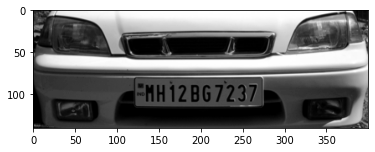

In [170]:
img = cv2.imread("images/Cars12.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to grey scale
plt.imshow(gray,cmap='gray')

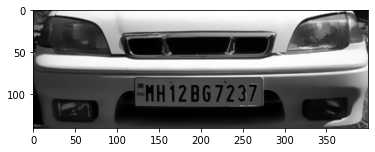

In [171]:
gray = cv2.bilateralFilter(gray, 13, 15, 15)
plt.imshow(gray,cmap='gray')

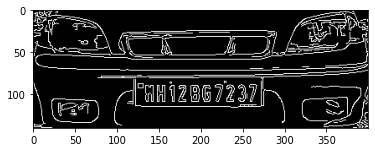

In [172]:
edged = cv2.Canny(gray,30,200) #  cv2.Canny(source_image, thresholdValue 1, thresholdValue 2)
plt.imshow(edged,cmap='gray')

In [173]:
contours=cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours,key=cv2.contourArea, reverse = True)[:10]
screenCnt = None

In [174]:
for c in contours:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
    # if our approximated contour has four points, then
    # we can assume that we have found our screen
    if len(approx) == 4:
        screenCnt = approx
        break

In [175]:
if screenCnt is None:
    detected = 0
    print ("No contour detected")
else:
     detected = 1

In [176]:
if detected == 1:
    cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)

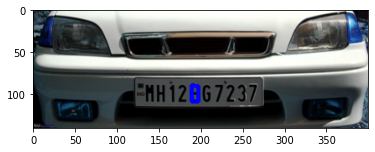

In [177]:
plt.imshow(img,cmap='gray')

In [178]:
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1)
new_image2 = cv2.bitwise_and(img,img,mask=mask)

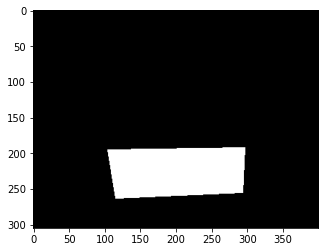

In [160]:
plt.imshow(new_image,cmap='gray')

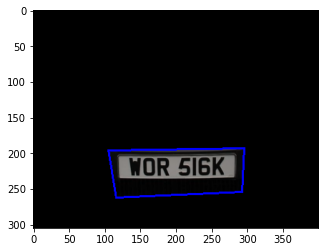

In [161]:
plt.imshow(new_image2,cmap='gray')

## Character Segmentation

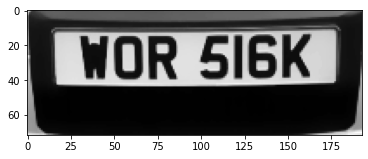

In [163]:
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]
plt.imshow(Cropped,cmap='gray')

In [164]:
"""
Question 4: Propose a Hough transform-based approach that could correct the
skewness of the text in the image.

Tasks: 
-In the corrected image, the text should appear aligned along the horizontal
direction
-Implement and test your proposed approach

"""
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
from skimage.transform import rotate
from skimage.feature import canny
from skimage.io import imread
from skimage import transform
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from scipy.stats import mode


def draw_contour_lines(image,h,theta,d):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()
    ax[1].imshow(image, cmap='gray')
    for  _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
        y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
        y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
        ax[1].plot((0, image.shape[1]), (y0, y1), '-r')

    ax[1].set_xlim((0, image.shape[1]))
    ax[1].set_ylim((image.shape[0], 0))
    ax[1].set_axis_off()
    ax[1].set_title('Detected lines')
    return fig


"""
Method: get_skew_angle

Description: retrieve the most appearing angle that we will use to rotate the image by.
"""
def get_skew_angle(angles):
    most_common_angle = mode(np.around(angles, decimals=2))[0]
    skew_angle = np.rad2deg(most_common_angle - np.pi/2)
    return skew_angle

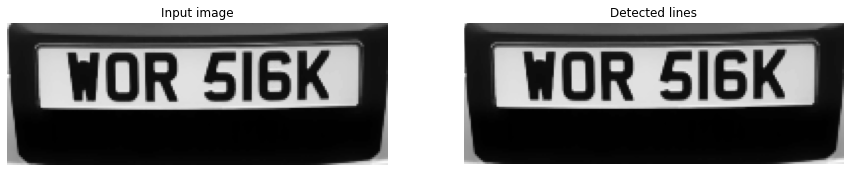

In [165]:
edges = canny(Cropped)
tested_angles = np.deg2rad(np.arange(-90, 90))
h, theta, d = hough_line(edges, theta=tested_angles)
accum, angles, dists = hough_line_peaks(h, theta, d)
fig = draw_contour_lines(Cropped,h,theta,d)

In [168]:
# skew_angle = get_skew_angle(angles)[0]
skew_angle

-179.95437383553926

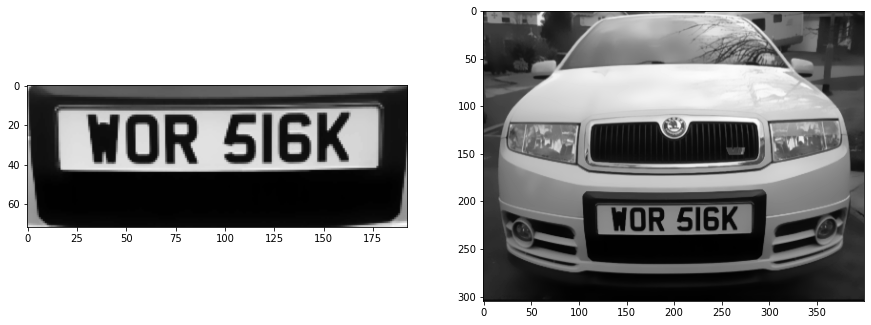

In [167]:
straight_image = rotate(gray,skew_angle+180)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].imshow(Cropped,cmap='gray')
axes[1].imshow(straight_image,cmap='gray')

In [169]:
from pytesseract import image_to_string 

text = pytesseract.image_to_string(Cropped)
print("Detected License Plate Number Is:  {}".format(text))
text

Detected License Plate Number Is:  


'\x0c'